# 04 대표적인 비지도 학습법
- 지도학습과 비지도학습

## 학습 내용
## 01. Autoencoder란?
## 02. 간단한 예제를 보자.
## 03. 어디에 사용되는가?

## 01. Autoencoder란?

### 대표적인 비지도학습으로 많이 쓰이는 신경망 오토인코더(Autoencoder)가 있
다.
## 오토 인코더는 입력값과 출력값을 같게 하는 신경망이다.
- 훈련 데이터와 매우 비슷한 새로운 데이터를 생성한다.
- 만약 얼굴 사진을 이용하여 오토 인코더를 훈련시키면 이 모델은 새로운 얼굴을 생성할 수 있다.
- 출력층의 뉴런수와 입력수가 동일하다는 것을 제외하면 일반적으로 오토 인코더는 다층 퍼셉트론과 동일한
구조를 갖는다.
## 인코더와 디코더로 구성
- 입력을 내부 표현을 변경하는 인코더(encoder)
- 내부 표현을 출력으로 바꾸는 디코더(decoder)
## 가운데 계층의 노드 수가 입력값보다 적은 것이 특징이다.
## 결과적으로 입력 데이터를 압축하는 효과를 얻는다. 이 과정이 노이즈 제거에 많이 효과
적이다.
## 변이형 오토인코더(Variational Autoencoder), 잡음제거 오토 인코더(Denoising
Autoencoder) 등의 방식이 존재

### 메모(알아두기) :
- (01) 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보낸다.
- (02) 은닉층의 데이터를 디코더를 통해 출력층으로 내보낸다.
- (03) 만들어진 출력값과 입력값이 같아지도록 만드는 가중치를 찾아낸다.

## 02. 간단한 예제를 보자.

In [0]:
import os, warnings
warnings.filterwarnings(action = 'ignore')

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01 # 학습율 0.01
training_epoch = 20 # 훈련 전체 데이터 사용 횟수 20회
batch_size = 100 # 배치 사이즈 100
n_hidden = 256 # 은닉층의 노드 개수 256 (Selected number, not designated)
n_input = 28 * 28 # 784개 (입력층)

### 오토 인코더의 핵심
- 인코더와 디코더를 만들기

### 인코더(encoder) 만들기
- STEP 01. 맨처음은 n_hidden개의 뉴런을 가지는 은닉층을 만들기
- STEP 02. 가중치(W)와 편향 변수(B)를 원하는 뉴런의 개수만큼 설정.
- STEP 03. 활성화 함수 sigmoid 함수를 적용.
- 기억해두기, n_input(입력층 노드) 값보다 n_hidden(은닉층 노드) 값이 더 작다.
  - 항상 그런것이 아니라 은닉층이 더 큰 오토인코더 모델도 있음.

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden])) # W의 지정
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

## 디코더(decoder) 만들기
- Tip01. 여기서 입력값은 은닉층의 노드수가 된다.
- Tip02. 출력값을 입력층의 크기로 만듬.

- 은닉층 데이터를 디코더를 통해 출력층으로 내보낸다.
- 만들어진 출력값을 입력값과 비슷해 지도록 만드는 가중치를 찾는다.

- 오토 인코더의 최종목표: 출력값가 입력값을 가장 비슷하게 만든다.

In [0]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

## 오토 인코더의 최종 목적은 출력값과 입력값을 가장 비슷하게 만드는 것
- 이렇게 될 경우, 은닉층의 뉴런들을 통해 입력값의 특징을 알 수 있음.

## 손실함수(cost) 및 최적화(optimizer)함수
- 입력값 X를 평가하기 위한 실측값 사용.
- 디코더가 내보낸 결과값과의 차이(X-decoder)를 손실값으로 설정.

In [0]:
cost = tf.reduce_mean(tf.pow(X- decoder, 2))

## 최적함 함수 사용 : RMSPropOptimizer 함수

In [0]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 학습 진행
- 세션 설정
- 배치 사이즈 지정
- 학습 수행

In [0]:
# learning_rate = 0.01 # 학습율 0.01
# training_epoch = 20 # 훈련 전체 데이터 사용 횟수 20회
# batch_size = 100 # 배치 사이즈 100
# n_hidden = 256 # 은닉층의 노드 개수 256 (Selected number, not designated)
# n_input = 28 * 28 # 784개 (입력층)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
  total_cost = 0
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost],
                          feed_dict = {X: batch_xs}) #비지도학습이니 y값이 필요가 없다. 
    
    total_cost += cost_val
    
  print('Epoch:', '%04d' %(epoch+1),
       'Avg Cost = ', '{:.3f}'.format(total_cost/total_batch))
  
print('최적화 완료!')

Epoch: 0001 Avg Cost =  0.197
Epoch: 0002 Avg Cost =  0.062
Epoch: 0003 Avg Cost =  0.049
Epoch: 0004 Avg Cost =  0.042
Epoch: 0005 Avg Cost =  0.040
Epoch: 0006 Avg Cost =  0.038
Epoch: 0007 Avg Cost =  0.037
Epoch: 0008 Avg Cost =  0.036
Epoch: 0009 Avg Cost =  0.035
Epoch: 0010 Avg Cost =  0.035
Epoch: 0011 Avg Cost =  0.034
Epoch: 0012 Avg Cost =  0.034
Epoch: 0013 Avg Cost =  0.033
Epoch: 0014 Avg Cost =  0.033
Epoch: 0015 Avg Cost =  0.033
Epoch: 0016 Avg Cost =  0.033
Epoch: 0017 Avg Cost =  0.032
Epoch: 0018 Avg Cost =  0.032
Epoch: 0019 Avg Cost =  0.032
Epoch: 0020 Avg Cost =  0.031
최적화 완료!


## 디코더로 생성해 낸 결과를 직관적 방법으로 확인

In [0]:
sample_size = 10
samples = sess.run(decoder, feed_dict = {X: mnist.test.images[:sample_size]})

samples

array([[1.1920929e-07, 0.0000000e+00, 0.0000000e+00, ..., 5.9604645e-08,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.2782555e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6093254e-06, 8.9406967e-08, 0.0000000e+00, ..., 0.0000000e+00,
        1.7285347e-06, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4901161e-07,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        5.6624413e-07, 4.7683716e-07],
       [1.1920929e-07, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [0]:
samples.shape

(10, 784)

## 위쪽 이미지가 원본, 아래쪽이 신경망(오토인코더)가 생성

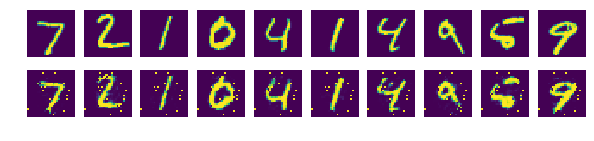

In [0]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size,2))

for i in range(sample_size):
  ax[0][i].set_axis_off()  #축 표시off
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  ax[1][i].imshow(np.reshape(samples[i], (28,28)))
  
  
plt.show()

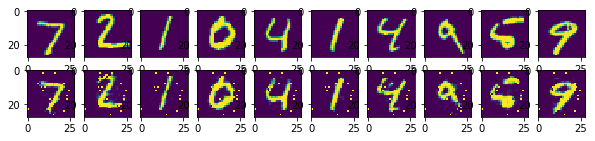

In [0]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size,2))

for i in range(sample_size):
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  ax[1][i].imshow(np.reshape(samples[i], (28,28)))
  
  
plt.show()

03. 어디에 사용되는가?

암호화, 비정상 거래 검출 등.